## Installation

In [1]:
!pip install -q tensorflow tensorflow-datasets

## Import Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Find Datasets

In [3]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

## Get information on the Data

In [4]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

print(info)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)



## Show Examples

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


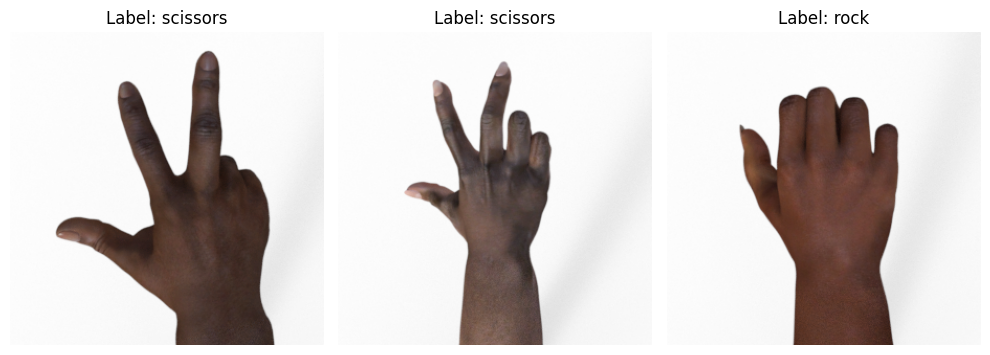

In [5]:
# Load dataset with image-label pairs
ds_train, info = tfds.load(
    name="rock_paper_scissors",
    split="train",
    as_supervised=True,
    with_info=True
)


# Get label names (e.g., 'rock', 'paper', 'scissors')
label_names = info.features['label'].names

# Take 3 examples
ds_sample = ds_train.take(3)

# Plot them
plt.figure(figsize=(10, 4))
for i, (image, label) in enumerate(ds_sample):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))  # Convert to displayable format
    plt.title(f"Label: {label_names[label.numpy()]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## Data Prep

In [6]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test  = tfds.load(name="rock_paper_scissors", split="test")

train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [7]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## Train a network (basic approach)

In [8]:
# Took 10 seconds
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 70s 832ms/step - accuracy: 0.3966 - loss: 54.4064
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 838ms/step - accuracy: 0.5935 - loss: 2.9684
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 831ms/step - accuracy: 0.7412 - loss: 0.7685
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 834ms/step - accuracy: 0.7984 - loss: 0.5140
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 831ms/step - accuracy: 0.7800 - loss: 0.7613


In [9]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6230 - loss: 1.3071


[1.3858927488327026, 0.5994623899459839]

## Train a Network (convolutional approach)

In [ ]:
# epochs=5, took 1 minutes

model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
18/79 ━━━━━━━━━━━━━━━━━━━━ 12:30 12s/step - accuracy: 0.3368 - loss: 28.6897

In [ ]:
model.evaluate(test_images, test_labels)

## A Better Convolutional Network

In [ ]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images,test_labels)

## Hyperparameter Tuning

In [ ]:
pip install -U keras-tuner

In [ ]:
# for trials=32, it took 24 minutes on GPU
# change max_trials to 5,10, 20, 32

# hp: Provided by Keras Tuner; used to define tunable hyperparameters.

from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  # Downsamples the image by taking average values in a 6x6 window, stride 3.
  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy', #  Tuner looks for best validation accuracy.
    max_trials=8, # this can be changed to 5,10, 20,32
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(test_images, test_labels)

In [ ]:
best_model.summary()

In [ ]:
tuner.results_summary()

# Miscellaneous Useful Techniques
## Save & Load our Models


In [ ]:
best_model.save('rock_paper_scissors.keras')

In [ ]:
loaded_model = keras.models.load_model('rock_paper_scissors.keras')

In [ ]:
loaded_model.evaluate(test_images, test_labels)

## Plot Image from Numpy Array

In [ ]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]
plt.imshow(rgb_image)
rgb_image.shape


## Use Model to Predict Result for Single Example

In [ ]:
result = best_model.predict(np.array([train_images[0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)